In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

plt.rc('font', family = 'Malgun Gothic')
pd.set_option('display.max_columns', None)
filterwarnings('ignore')

In [2]:
df_c = pd.read_csv('./dataset/performance_cluster_ver03.csv', index_col = 0)
df = pd.read_csv('./dataset/pivot_price_ver02.csv', index_col = 0)

In [3]:
df_c.reset_index()

,index,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,clustering
0,0,31,30,1757,0,5,4,10,14,14,10,4,120,15,29,4,9,19,100000,0,1818,2
1,1,40,21,2402,0,10,7,5,20,17,1,1,140,20,28,3,3,27,100000,0,2463,2
2,2,168,311,1441,2,38,49,98,122,101,48,21,120,15,215,25,75,164,100000,1,1920,1
3,3,0,0,3007,0,0,0,0,0,0,0,0,100,20,0,0,0,0,0,1,3007,2
4,4,0,0,2192,0,0,0,0,0,0,0,0,120,20,0,0,0,0,0,0,2192,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,706,858,1257,10,237,310,326,400,220,55,6,120,15,578,263,184,539,50000,0,2821,0
747,747,659,1418,38,27,243,297,444,544,352,119,51,120,20,421,395,246,1015,200000,1,2115,3
748,748,312,761,103,12,154,237,295,220,100,30,25,100,20,244,219,155,455,130000,1,1176,0
749,749,426,1549,1140,6,86,205,463,457,553,188,17,120,15,812,164,270,729,30000,0,3115,3


## performance id 생성

In [4]:
df_grade = pd.read_csv('./dataset/df_grade.csv')

tmp = sorted(df_grade.play.unique())

for id, date in enumerate(tmp):
    idx = df_grade.query(f'`play` == "{date}"').index
    df_grade.loc[idx,'performance_id'] = id
    

In [5]:
df_grade.performance_id = df_grade.performance_id.astype('int')
df_grade.drop('performance_code', axis = 1, inplace = True)


In [7]:
df_tojoin = df_c.reset_index()[['index', 'clustering']]
df_tojoin.columns = ['performance_id', 'clustering']
df_grade_cluster = pd.merge(df_grade, df_tojoin, on = 'performance_id', how = 'left')

In [9]:
# df_grade_cluster.to_csv('./dataset/df_grade_cluster_ver02.csv')

## 장르 코드를 한글명으로 변환

In [19]:
df_c['genre'] = df['genre']

In [20]:
# genres = dict(zip(range(df.genre.nunique()), df.genre.unique()))

# for i in range(len(df_c)):
#     idx = df_c.loc[i, 'genre']
#     df_c.loc[i,'genre'] = genres[idx]
    
# df_c

In [21]:
# df_c.loc[:,'play_timezone'] = np.where(df_c.play_timezone == 0, '낮', '저녁')

## 군집별 price 평균

In [26]:
df_c.columns = ['gender_m', 'gender_f', 'member_n', 'age_10', 'age_20', 'age_30',
       'age_40', 'age_50', 'age_60', 'age_70', 'age_80', 'running_time',
       'intermission', 'member_free', 'member_green', 'member_blue',
       'member_gold', 'price', 'play_timezone', 'total_member', 'cluster',
       'genre']

In [27]:
df_c.groupby('cluster')['price'].mean()

cluster
0     98651.515152
1     90626.334520
2     76161.904762
3    177419.354839
Name: price, dtype: float64

## 군집별 공연의 수

In [28]:
df_c.groupby('cluster')['price'].count()

cluster
0    198
1    281
2    210
3     62
Name: price, dtype: int64

## 전체 공연 장르 빈도 수 

[]

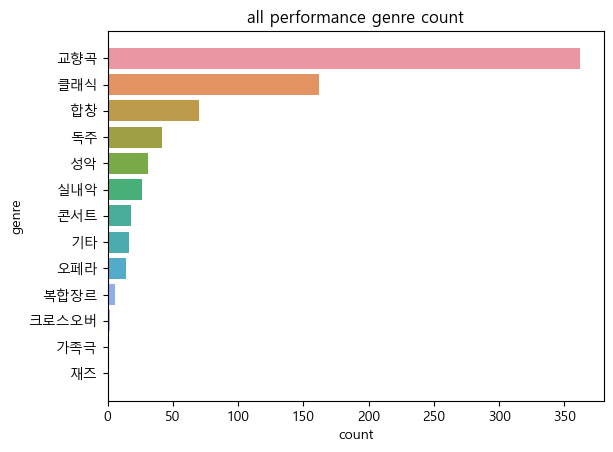

In [29]:
genre_all = df_c.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_all.columns = ['count']

sns.barplot(y = genre_all.index, x = 'count', data = genre_all)

plt.title('all performance genre count')
plt.plot()

## 군집별 장르 빈도 파악

[]

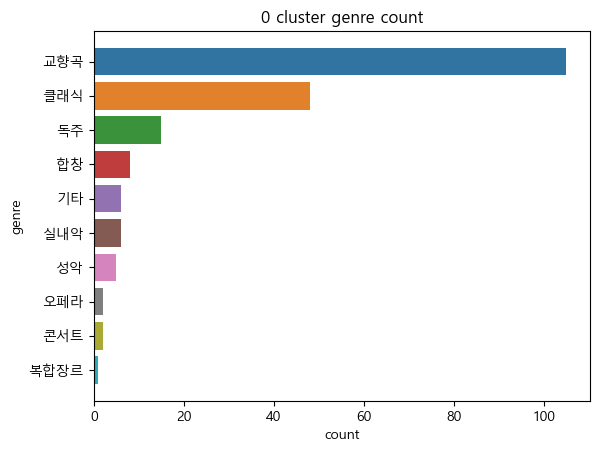

In [30]:
df_0 = df_c.query('`cluster` == 0')

genre_0 = df_0.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_0.columns = ['count']
genre_0

sns.barplot(y = genre_0.index, x = 'count', data = genre_0)

plt.title('0 cluster genre count')
plt.plot()

In [31]:
df_0.drop('genre', inplace = True, axis = 1)

df_0.loc['평균', :] = df_0.loc[:,:].mean(axis= 0)

df_0.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,385.742424,682.90404,383.606061,7.888889,129.934343,185.227273,244.439394,257.151515,177.287879,50.722222,15.994949,109.722222,14.242424,344.272727,171.80303,137.212121,415.358586,98651.515152,0.59596,1452.252525,0.0


[]

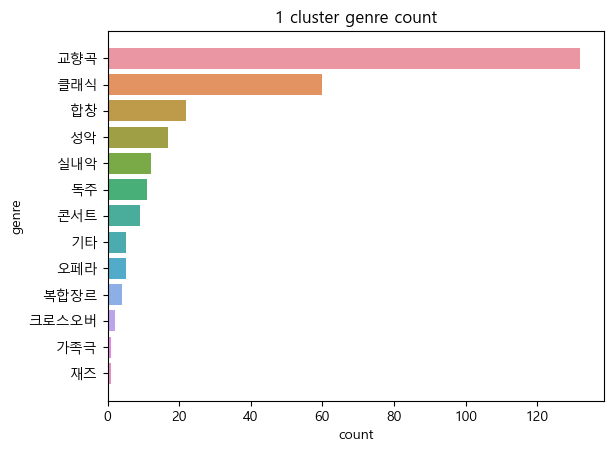

In [32]:
df_1 = df_c.query('`cluster` == 1')

genre_1 = df_1.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_1.columns = ['count']

sns.barplot(y = genre_1.index, x = 'count', data = genre_1)

plt.title('1 cluster genre count')
plt.plot()

In [33]:
df_1.drop('genre', inplace = True, axis = 1)

df_1.loc['평균', :] = df_1.loc[:,:].mean(axis= 0)

df_1.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,154.914591,259.594306,427.355872,2.672598,56.886121,73.227758,93.120996,98.551601,67.839858,18.234875,3.975089,107.227758,14.181495,148.743772,62.252669,50.156584,153.355872,90626.33452,0.686833,841.864769,1.0


[]

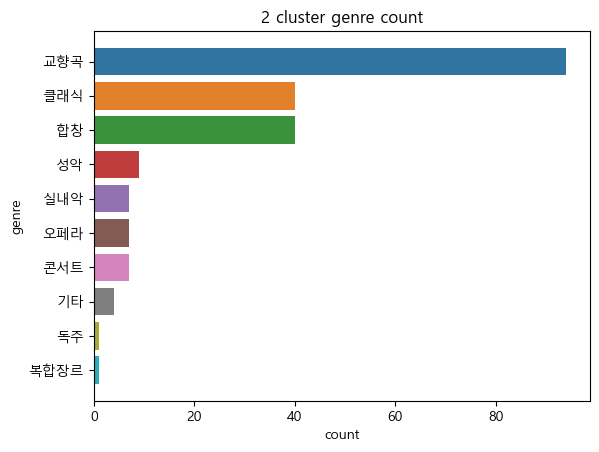

In [34]:
df_2 = df_c.query('`cluster` == 2')

genre_2 = df_2.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_2.columns = ['count']

sns.barplot(y = genre_2.index, x = 'count', data = genre_2)

plt.title('2 cluster genre count')
plt.plot()

In [35]:
df_2.drop('genre', inplace = True, axis = 1)

df_2.loc['평균', :] = df_2.loc[:,:].mean(axis= 0)

df_2.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,38.761905,58.404762,1860.561905,0.890476,14.309524,12.933333,20.780952,23.57619,17.519048,5.680952,1.47619,113.580952,14.809524,42.061905,8.047619,10.204762,36.852381,76161.904762,0.733333,1957.728571,2.0


[]

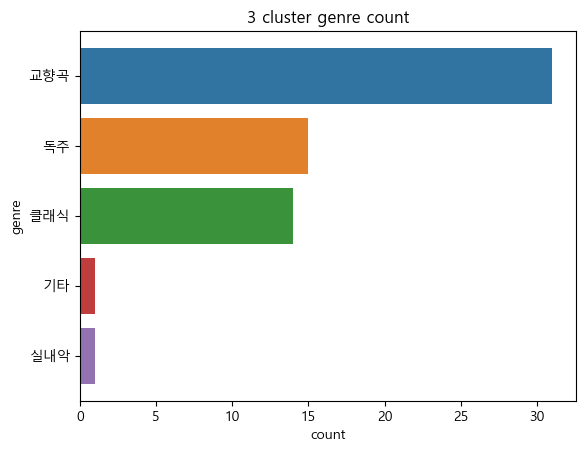

In [36]:
df_3 = df_c.query('`cluster` == 3')

genre_3 = df_3.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
genre_3.columns = ['count']

sns.barplot(y = genre_3.index, x = 'count', data = genre_3)

plt.title('3 cluster genre count')
plt.plot()

In [37]:
df_3.drop('genre', inplace = True, axis = 1)

df_3.loc['평균', :] = df_3.loc[:,:].mean(axis= 0)

df_3.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,664.5,1533.645161,408.741935,20.532258,231.677419,415.5,575.516129,515.854839,320.709677,90.5,27.854839,112.33871,13.709677,463.967742,478.064516,317.048387,939.064516,177419.354839,0.564516,2606.887097,3.0


In [38]:
# df_4 = df_c.query('`cluster` == 4')

# genre_4 = df_4.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
# genre_4.columns = ['count']

# sns.barplot(y = genre_4.index, x = 'count', data = genre_4)

# plt.title('4 cluster genre count')
# plt.plot()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# df_4.drop('genre', inplace = True, axis = 1)

# df_4.loc['평균', :] = df_4.loc[:,:].mean(axis= 0)

# df_4.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,168.635838,214.479769,952.890173,2.531792,55.132948,60.32948,72.283237,94.040462,74.710983,21.040462,3.046243,108.260116,16.069364,138.33526,44.445087,44.982659,155.352601,44739.884393,1.0,1336.00578,4.0


[]

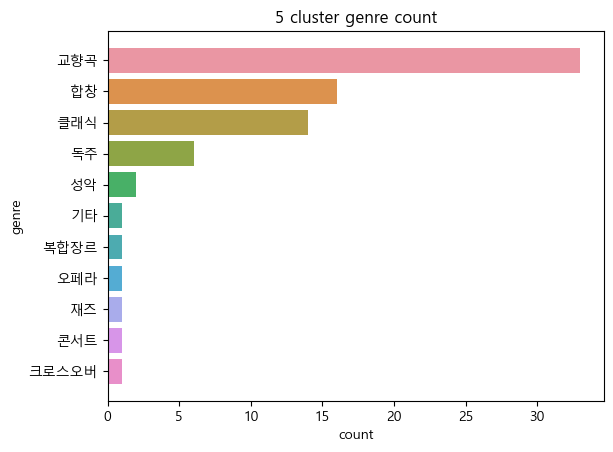

In [ ]:
# df_5 = df_c.query('`cluster` == 5')

# genre_5 = df_5.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
# genre_5.columns = ['count']

# sns.barplot(y = genre_5.index, x = 'count', data = genre_5)

# plt.title('5 cluster genre count')
# plt.plot()

In [ ]:
# df_5.drop('genre', inplace = True, axis = 1)

# df_5.loc['평균', :] = df_5.loc[:,:].mean(axis= 0)

# df_5.tail(1)

,gender_m,gender_f,member_n,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,running_time,intermission,member_free,member_green,member_blue,member_gold,price,play_timezone,total_member,cluster
평균,239.857143,397.675325,778.844156,5.987013,80.909091,113.753247,151.38961,155.207792,96.480519,26.675325,7.12987,93.896104,0.0,215.649351,104.480519,75.961039,241.441558,75428.571429,0.662338,1416.376623,5.0


[]

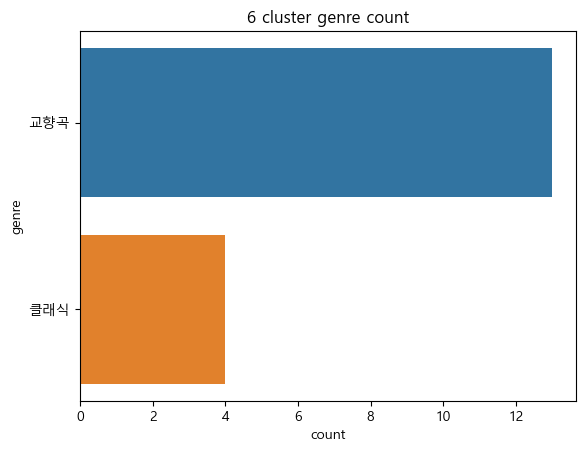

In [ ]:
# df_6 = df_c.query('`cluster` == 6')

# genre_6 = df_6.groupby('genre')[['cluster']].count().sort_values('cluster', ascending = False )
# genre_6.columns = ['count']

# sns.barplot(y = genre_6.index, x = 'count', data = genre_6)

# plt.title('6 cluster genre count')
# plt.plot()

In [39]:
# df_6.drop('genre', inplace = True, axis = 1)

# df_6.loc['평균', :] = df_6.loc[:,:].mean(axis= 0)

# df_6.tail(1)

## 군집별 feature 평균

In [40]:
mean_0 = df_0.tail(1).T
mean_1 = df_1.tail(1).T
mean_2 = df_2.tail(1).T
mean_3 = df_3.tail(1).T
# mean_4 = df_4.tail(1).T
# mean_5 = df_5.tail(1).T
# mean_6 = df_6.tail(1).T

mean_0.columns = ['mean_0']
mean_1.columns = ['mean_1']
mean_2.columns = ['mean_2']
mean_3.columns = ['mean_3']
# mean_4.columns = ['mean_4']
# mean_5.columns = ['mean_5']
# mean_6.columns = ['mean_6']

In [41]:
cluster_mean = pd.DataFrame(index = mean_0.index, data = {'mean_0' : mean_0.mean_0.values,
                                           'mean_1' : mean_1.mean_1.values,
                                           'mean_2' : mean_2.mean_2.values,
                                           'mean_3' : mean_3.mean_3.values})

In [42]:
cmp = cluster_mean

cmp

,mean_0,mean_1,mean_2,mean_3
gender_m,385.742424,154.914591,38.761905,664.500000
gender_f,682.904040,259.594306,58.404762,1533.645161
member_n,383.606061,427.355872,1860.561905,408.741935
age_10,7.888889,2.672598,0.890476,20.532258
age_20,129.934343,56.886121,14.309524,231.677419
age_30,185.227273,73.227758,12.933333,415.500000
age_40,244.439394,93.120996,20.780952,575.516129
age_50,257.151515,98.551601,23.576190,515.854839
age_60,177.287879,67.839858,17.519048,320.709677
age_70,50.722222,18.234875,5.680952,90.500000


In [43]:
cluster_mean.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3'] 

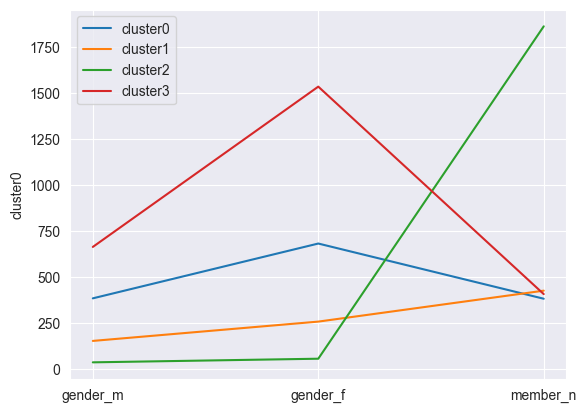

In [44]:
sns.set_style('darkgrid')
cmp = cluster_mean.loc[['gender_m', 'gender_f', 'member_n'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

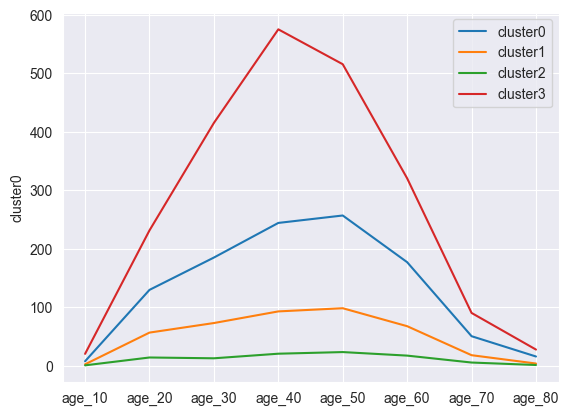

In [45]:
cmp = cluster_mean.loc[['age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

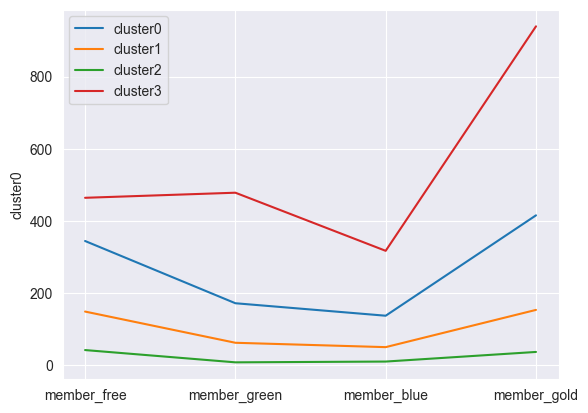

In [46]:
cmp = cluster_mean.loc[['member_free', 'member_green', 'member_blue', 'member_gold'],:]
for column in cmp.columns:
    sns.lineplot(data=cmp, x=cmp.index, y=column, label=column)

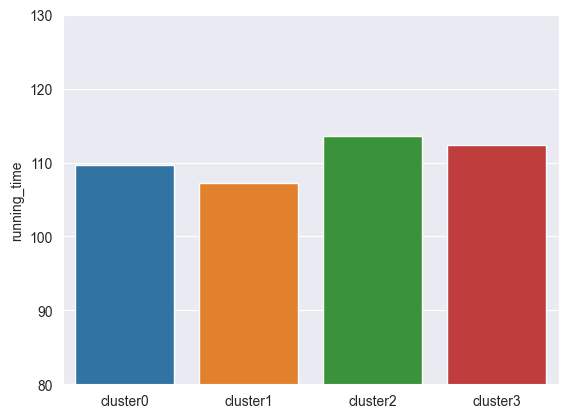

In [47]:
cmp = cluster_mean.loc[['running_time'],:].T
sns.barplot(data=cmp, x=cmp.index, y='running_time', label='running_time')
plt.ylim([80, 130])
plt.show()

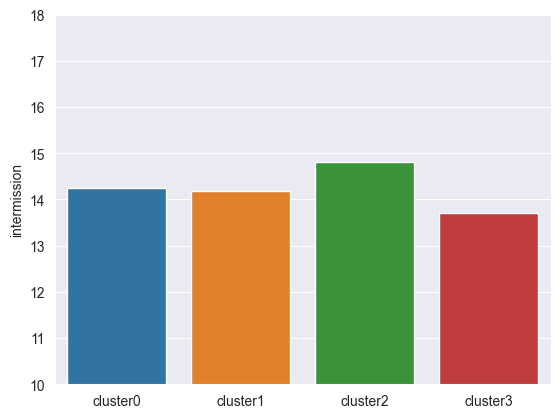

In [48]:
cmp = cluster_mean.loc[['intermission'],:].T
sns.barplot(data=cmp, x=cmp.index, y='intermission', label='intermission')
plt.ylim([10, 18])
plt.show()

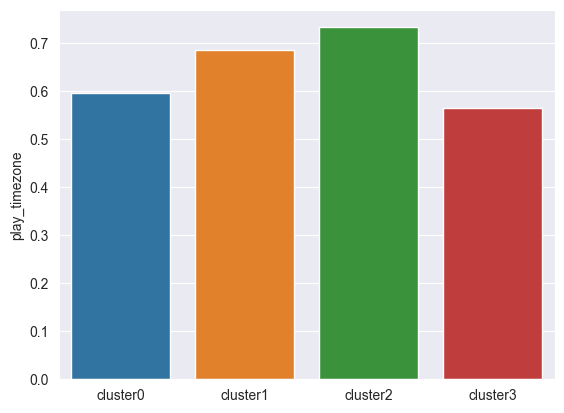

In [49]:
cmp = cluster_mean.loc[['play_timezone'],:].T
sns.barplot(data=cmp, x=cmp.index, y='play_timezone', label='play_timezone')
plt.show()

In [50]:
cmp

,play_timezone
cluster0,0.595960
cluster1,0.686833
cluster2,0.733333
cluster3,0.564516


In [52]:
cmp2 = df_c.groupby('cluster')[['price']].count().reset_index()
cmp2.columns = ['cluster', 'perform_counts']
cmp2.cluster = ['cluster0', 'cluster1', 'cluster2', 'cluster3']

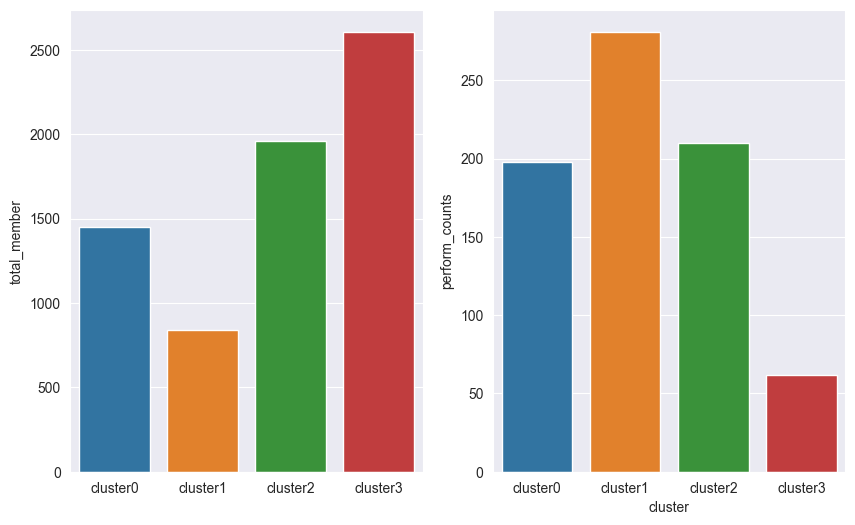

In [53]:

fig, ax = plt.subplots(1, 2, figsize = (10, 6))

cmp = cluster_mean.loc[['total_member'],:].T

sns.barplot(data=cmp, x=cmp.index, y='total_member', label='total_member', ax = ax[0])
sns.barplot(data =cmp2, x = 'cluster', y = 'perform_counts', ax = ax[1])
plt.show()

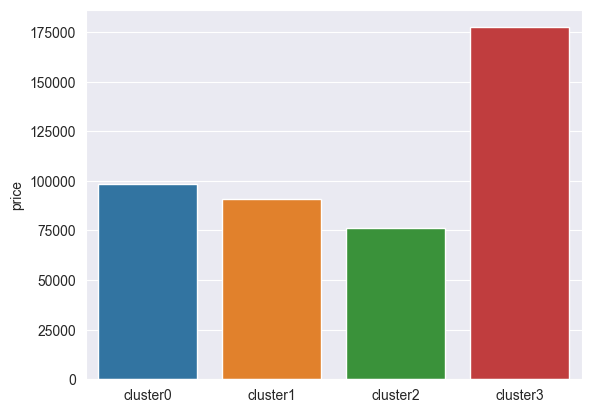

In [54]:
cmp = cluster_mean.loc[['price'],:].T
sns.barplot(data=cmp, x=cmp.index, y='price', label='price')
plt.show()